# Lesson 7: Sampling Distributions and the Central Limit Theorem

Goals and Key Ideas:

0. Statistical Inference
1. Understanding Sample Averages and Sampling Distributions
    + Simple Random Sample
    + Population vs. Sample
    + True Average vs. Sample Average (aka Sample Mean)
    + Sampling distributions
2. The Central Limit Theorem
    + Review of important properties of the normal distribution
    + Python tools for working with the normal distribution
3. Confidence Intervals
    + Computing confidence intervals
    + Interpreting confidence intervals





In [66]:
# load the libraries

import pandas as pd
import numpy as np
import seaborn as sns

## 1. Understanding Sample Averages and Sampling Distributions

In [89]:
population_data = pd.DataFrame( data = {'num_sibs':[3,
0,
1,
3,
1,
0,
1,
1,
0,
0,
1,
1,
1,
1,
0,
1,
1,
1,
2,
1,
1,
0,
4,
0,
0,
0,
1,
1,
1,
1,
4,
0,
1,
1,
0,
5,
1,
1,
5,
1,
1,
1,
1,
0,
2,
1,
0,
1,
1,
3,
1,
0,
2,
3,
2,
2,
1,]  })

In [85]:
population_data.describe()

,num_sibs
count,57.000000
mean,1.228070
std,1.210336
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


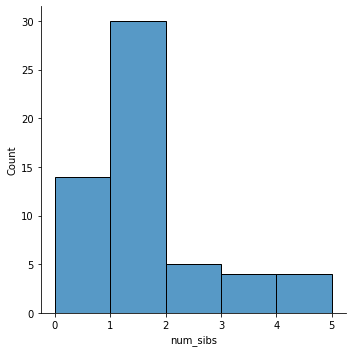

In [69]:
sns.displot( data = population_data, x = 'num_sibs', bins=5)

In [86]:
population_data.shape

# we have a population of 57 students

true_average = np.mean( population_data['num_sibs'] )
true_std_dev = np.std( population_data['num_sibs'] )
print(true_average)
print(true_std_dev)

1.2280701754385965
1.1996716489318426


In [90]:
sample1 = np.random.choice( population_data['num_sibs'] , 7, replace = False )
sample1

array([1, 0, 1, 0, 3, 0, 5])

In [91]:
sample_average = np.mean(sample1)
sample_average

1.4285714285714286

In [73]:
# repeated sampling results

repeated_sampling = pd.read_csv('../../shared/datasets/lesson07_data1.csv')


In [74]:
#remove outlier
repeated_sampling_nooutlier = repeated_sampling[ repeated_sampling['sample_mean'] < 7 ]

In [75]:
repeated_sampling_nooutlier.shape

(105, 2)

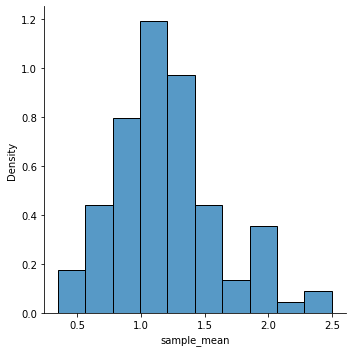

In [76]:
# histogram to visualize the sampling distribution

sns.displot( data = repeated_sampling_nooutlier , x ='sample_mean' , stat = 'density', bins = 10)

In [77]:
repeated_sampling_nooutlier.describe()

,sample_mean
count,105.000000
mean,1.189827
std,0.424675
min,0.346000
25%,0.857140
50%,1.142000
75%,1.400000
max,2.500000


## 2. Understanding the Central Limit Theorem

In [108]:
# normal distribution with mean 0 and std deviation 1

# what is the area under the curve to the left of -2

import scipy
scipy.stats.norm.cdf( -2 , 0, 1 )

0.022750131948179195

In [109]:
# what is the area under the curve to the left of 8

scipy.stats.norm.cdf( 8 , 0, 1 )

0.9999999999999993

In [110]:
# what is the area under the curve to the left of -1

scipy.stats.norm.cdf( -1 , 0, 1 )

0.15865525393145707

In [111]:
# what is the area under the curve to the left of 1

scipy.stats.norm.cdf( 1 , 0, 1 )

0.8413447460685429

In [112]:
# what is the area under the curve to between -1 and 1

scipy.stats.norm.cdf( 1 , 0, 1 ) - scipy.stats.norm.cdf( -1 , 0, 1 )

0.6826894921370859

In [78]:
# find the 90th percentile for normal distr with mean 0 and std 1

scipy.stats.norm.ppf( 0.9, 0, 1)

1.2815515655446004

In [79]:
# find the 50th percentile for normal distr with mean 3 and std 2

scipy.stats.norm.ppf( 0.5, 3, 2)

3.0

### Further Illustration of the Central Limit Theorem

In [63]:
# don't worry about understanding this code cell.  The only purpose is to produce the graph below.

N = 25 #sample size
numrepeat = 10000
sampling_distribution_df = pd.DataFrame( data = {'sample_means':np.zeros(numrepeat)})
for i in np.arange(numrepeat):
    sample = np.random.choice( population_data['num_sibs'], N, replace = False )
    sampling_distribution_df['sample_means'][i] = np.mean(sample)    

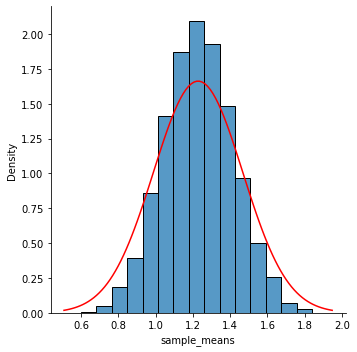

In [64]:
# don't worry about understanding this code cell.  The only purpose is to produce the graph below.
import matplotlib.pyplot as plt
import math
import scipy
sns.displot( data = sampling_distribution_df, x = 'sample_means', bins = 15, stat = 'density')

mu = true_average
sigma = true_std_dev/math.sqrt(N)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), 'red')
plt.show()

In [80]:
import scipy

In [81]:
LOW = scipy.stats.norm.ppf( 0, 3 , 2)
HIGH = scipy.stats.norm.ppf(0.8, 3, 2)

print(LOW)
print(HIGH)

-inf
4.683242467145829


In [82]:
LOW = scipy.stats.norm.ppf( 0.1, 3 , 2)
HIGH = scipy.stats.norm.ppf(0.9, 3, 2)

print(LOW)
print(HIGH)

0.43689686891079926
5.563103131089201


In [83]:
LOW = scipy.stats.norm.ppf( 0.2, 3 , 2)
HIGH = scipy.stats.norm.ppf(1, 3, 2)

print(LOW)
print(HIGH)

1.3167575328541716
inf


## 3. Confidence Intervals

In [92]:
sample1 = np.random.choice( population_data['num_sibs'] , 7, replace = False )
sample1

array([1, 4, 1, 5, 5, 2, 1])

In [94]:
sample_mean = np.mean(sample1)
sample_mean

2.7142857142857144

In [95]:
sample_std_deviation = np.std(sample1)
sample_std_deviation

1.749635530559413

In [98]:
# a 95% confidence interval

import math

LOW = scipy.stats.norm.ppf( 0.025, sample_mean, sample_std_deviation / math.sqrt(7) )
HIGH = scipy.stats.norm.ppf( 0.975, sample_mean, sample_std_deviation / math.sqrt(7) )

print(LOW)
print(HIGH)

1.418161391630371
4.010410036941058


In [99]:
# Compute multiple 95% confidence intervals (via google form)
# result:

result = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTexKM9ltXfHsoRcSTe6ZGv6rG-Ba-nCMjLADlsD2Eqhklz2B4vks67fF0gZFBD8i5ZRXuIcs_5_UOh/pub?output=csv')

In [100]:
result

,Timestamp,sample_mean,sample_standard_deviation,LOW,HIGH
0,3/25/2021 9:11:54,1.571429,1.049781,0.793754,2.349103
1,3/25/2021 9:12:11,1.142857,0.989743,0.409659,1.876056
2,3/25/2021 9:12:13,1.430000,1.500000,1.050000,2.540000
3,3/25/2021 9:12:12,0.857000,0.639000,0.384000,1.330000
4,3/25/2021 9:12:11,2.710000,1.749000,1.418000,4.010000
5,3/25/2021 9:12:13,0.428571,0.494872,0.061972,0.795171
6,3/25/2021 9:12:19,1.571429,1.498298,0.461494,2.636529
7,3/25/2021 9:12:23,1.285714,0.880631,0.633346,1.938083
8,3/25/2021 9:12:32,0.857000,0.349000,0.597000,1.110000
9,3/25/2021 9:12:36,0.430000,0.490000,0.060000,0.160000


In [106]:
# out of 20 confidence intervals, 4 do not contain the true average (1.22): rows 4, 15, 17, 18

16/20  # 80% of the 20 95%-confidence intervals contain the true average

# if we had more 95%-confidence intervals (e.g., 1000 instead of just 20)
#      the proportion of all 95%-confidence intervals that contain the true average is going to be about 95%

0.8